In [1]:
import pandas as pd
import numpy as np
from os import listdir
import os
from os.path import join, isfile, isdir
import matplotlib.pyplot as plt

In [2]:
# org_data:         original data
# training_data:    training data (unscaled)
# training_scaled:  training data (scaled)
# volve:            test data (unscaled)
# volve_scaled:     test data (scaled)

## original data

In [3]:
source = "path/to/original/data"
files = [f for f in os.listdir(source) if isfile(join(source, f))]
org_data = pd.read_csv(source + files[0])
for f in files[1:]:  
    file = pd.read_csv(source + f)
    org_data = org_data.append(file, ignore_index=True)

In [4]:
# Percentage of rows with missing values
(org_data.shape[0] - org_data.dropna().shape[0])/org_data.shape[0]

0.650918136885863

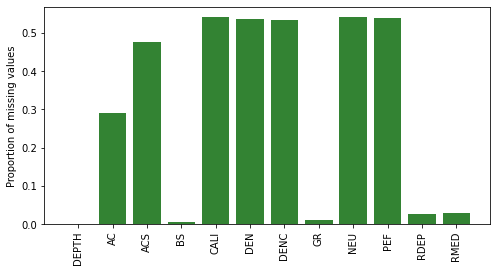

In [5]:
# Proportion of missing data per column
missingCol = org_data.isnull().sum()/len(org_data)
fig = plt.figure(figsize=(8,4))
plt.bar(list(org_data)[:-1],missingCol[:-1], color='darkgreen', alpha=0.8)
plt.xticks(rotation=90)
plt.ylabel("Proportion of missing values")
plt.savefig("missing_values_col" + '.pdf', bbox_inches='tight')
plt.show()

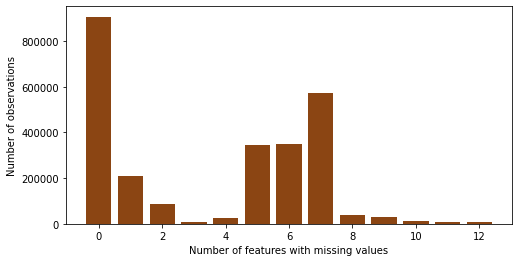

In [6]:
# Proportion of missing data per row
missingRow = org_data.isnull().sum(axis=1).value_counts().sort_index(ascending=True)
fig = plt.figure(figsize=(8,4))
plt.bar(missingRow.keys().tolist(),missingRow,color='saddlebrown', alpha=1.0)
plt.xlabel("Number of features with missing values")
plt.ylabel("Number of observations")
plt.savefig("missing_values_row" + '.pdf', bbox_inches='tight')
plt.show()

## training data (unscaled)

In [7]:
source = "path/to/training/data"
files = [f for f in os.listdir(source) if isfile(join(source, f))]
training_data = pd.read_csv(source + files[0])
for f in files[1:]:  
    file = pd.read_csv(source + f)
    training_data = training_data.append(file, ignore_index=True)

In [8]:
training_data.min()

DEPTH           220.6752
AC              43.23489
ACS             76.70515
BS                   6.0
CALI            2.003554
DEN             1.153019
DENC           -1.576752
GR                   0.0
NEU              -0.0191
PEF            -59.04468
RDEP            0.073844
RMED            0.066667
dtype: object

In [9]:
training_data.max()

DEPTH        7093.0008
AC             286.041
ACS           798.4306
BS                17.5
CALI          27.92805
DEN           3.654793
DENC          6.733387
GR            953.7303
NEU           7.686814
PEF           137.4431
RDEP          100000.0
RMED          100000.0
dtype: object

In [10]:
training_data.mean()

DEPTH    2386.901198
AC        104.522184
ACS       232.824196
BS         10.522482
CALI       10.692392
DEN         2.371792
DENC        0.022808
GR         74.993511
NEU         0.330380
PEF         4.911073
RDEP       17.338168
RMED       13.755141
dtype: float64

In [11]:
training_data.std()

DEPTH    1086.115893
AC         27.478215
ACS       103.827090
BS          2.447217
CALI        2.652894
DEN         0.210044
DENC        0.048962
GR         35.224564
NEU         0.150530
PEF         2.438237
RDEP      450.866719
RMED      246.677419
dtype: float64

In [12]:
def plotBar(data, bins, filename):
    hist, bin_edges = np.histogram(data,bins) # make the histogram

    fig,ax = plt.subplots(figsize=(8,4))

    # Plot the histogram heights against integers on the x axis
    ax.bar(range(len(hist)),hist,width=0.9,align='edge',alpha=0.8,color='purple') 

    # Set the ticks to the middle of the bars
    ax.set_xticks([0.45+i for i,j in enumerate(hist)])

    # Set the xticklabels to a string that tells us what the bin edges were
    ax.set_xticklabels(['{}-{}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])

    plt.ylabel('Number of observations')
    plt.savefig(filename + '.pdf', bbox_inches='tight')

    plt.show()

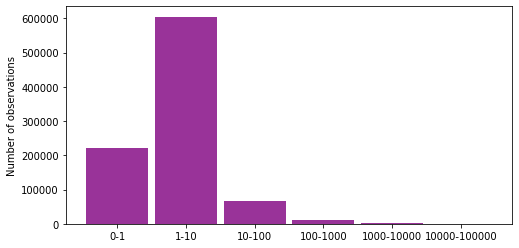

In [13]:
bins = [0,1,10,100,1000,10000,100000] # your bins
rmed = training_data.RMED # random data
plotBar(rmed,bins,'rmed_hist_before')

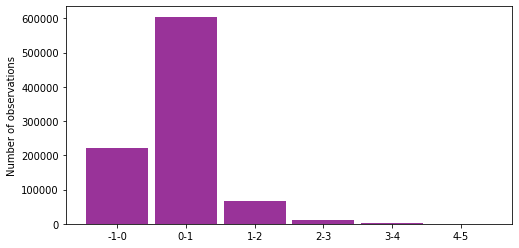

In [14]:
bins = range(-1,6) # your bins
rmed_log = np.log10(training_data.RMED) # random data
plotBar(rmed_log,bins,'rmed_hist_after')

## training data (scaled)

In [15]:
import master.vae_processing as v
import joblib
scale = joblib.load('scaler_remove.pkl')
training_scaled,_ = v.scale_and_shape(source, ['DEPTH'], 'remove', nLines=1)

In [16]:
training_scaled.min()

AC         0.0
ACS        0.0
DEN        0.0
DENC       0.0
GR         0.0
NEU        0.0
PEF        0.0
RDEP       0.0
RMED       0.0
CALI-BS    0.0
dtype: float64

In [17]:
training_scaled.max()

AC         1.000000
ACS        0.997883
DEN        1.000000
DENC       1.000000
GR         1.000000
NEU        1.000000
PEF        1.000000
RDEP       1.000000
RMED       1.000000
CALI-BS    1.000000
dtype: float64

In [18]:
training_scaled.mean()

AC         0.252397
ACS        0.216273
DEN        0.487179
DENC       0.192481
GR         0.078639
NEU        0.045353
PEF        0.325499
RDEP       0.239934
RMED       0.245268
CALI-BS    0.268813
dtype: float64

In [19]:
training_scaled.std()

AC         0.113171
ACS        0.143778
DEN        0.083961
DENC       0.005908
GR         0.036935
NEU        0.019533
PEF        0.012437
RDEP       0.083448
RMED       0.082656
CALI-BS    0.026176
dtype: float64

## test data (unscaled)

In [20]:
source_test = "path/to/test/data/"
# Combine all data into a single dataframe
files = [f for f in os.listdir(source_test) if isfile(join(source_test, f))]
volve = pd.read_csv(source_test + files[0])
for f in files[1:]:  
    file = pd.read_csv(source_test + f)
    volve = volve.append(file, ignore_index=True)

In [21]:
volve.min()

DEPTH    2582.9000
AC         48.9274
ACS        74.8224
BS          8.5000
CALI        8.5000
DEN         2.0896
DENC       -0.0035
GR          0.8379
NEU        -0.0034
PEF         4.8358
RDEP        0.1174
RMED        0.0711
dtype: float64

In [22]:
volve.max()

DEPTH     4513.0000
AC         136.2539
ACS        388.8397
BS           8.5000
CALI         8.9922
DEN          3.0040
DENC         0.1975
GR         437.8234
NEU          0.4857
PEF         11.5376
RDEP        46.3389
RMED     62290.7700
dtype: float64

In [23]:
volve.mean()

DEPTH    3528.682858
AC         74.188669
ACS       138.153199
BS          8.500000
CALI        8.684332
DEN         2.502100
DENC        0.059519
GR         27.591771
NEU         0.144904
PEF         7.732236
RDEP        3.715428
RMED        9.416514
dtype: float64

In [24]:
volve.std()

DEPTH    554.735835
AC        13.376483
ACS       37.744521
BS         0.000000
CALI       0.056002
DEN        0.126291
DENC       0.008473
GR        35.231151
NEU        0.088624
PEF        1.086567
RDEP       3.078810
RMED     511.889359
dtype: float64

## test data (scaled)

In [25]:
import master.vae_processing as v
import joblib
scale = joblib.load('scaler_remove.pkl')
volve_scaled,_ = v.scale_and_shape(source_test, ['DEPTH'], 'remove', nLines=1)

In [26]:
volve_scaled.min()

AC         0.023445
ACS       -0.002609
DEN        0.374367
DENC       0.189317
GR         0.000925
NEU        0.002141
PEF        0.325112
RDEP       0.032838
RMED       0.004527
CALI-BS    0.261959
dtype: float64

In [27]:
volve_scaled.max()

AC         0.383100
ACS        0.432484
DEN        0.739867
DENC       0.213504
GR         0.459064
NEU        0.065508
PEF        0.359220
RDEP       0.456258
RMED       0.966714
CALI-BS    0.281806
dtype: float64

In [28]:
volve_scaled.mean()

AC         0.127741
ACS        0.085369
DEN        0.539067
DENC       0.196903
GR         0.028956
NEU        0.021329
PEF        0.339831
RDEP       0.252586
RMED       0.263619
CALI-BS    0.269385
dtype: float64

In [29]:
volve_scaled.std()

AC         0.055235
ACS        0.052614
DEN        0.050578
DENC       0.001017
GR         0.036878
NEU        0.011524
PEF        0.005544
RDEP       0.064090
RMED       0.069128
CALI-BS    0.002261
dtype: float64

## CALI-BS

In [30]:
# Possible way to visualize why we use CALI-BS
A = abs(np.random.normal(0,1,50))+6
B = abs(np.random.normal(0,1,50))+3.5
C = list(A) + list(B)
D = [6]*50 + [3.5]*50

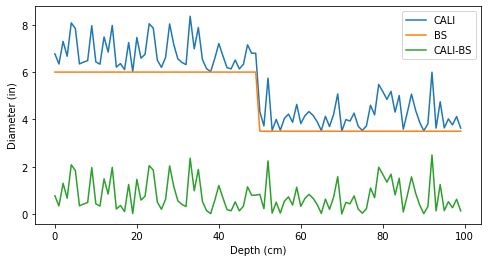

In [31]:
fig = plt.figure(figsize=(8,4))
plt.plot(C)
plt.plot(D)
plt.plot(list(np.array(C) - np.array(D)))
plt.legend(['CALI', 'BS', 'CALI-BS'])
plt.ylabel('Diameter (in)')
plt.xlabel('Depth (cm)')
plt.savefig('CALI_BS' + '.pdf', bbox_inches='tight')
plt.show()